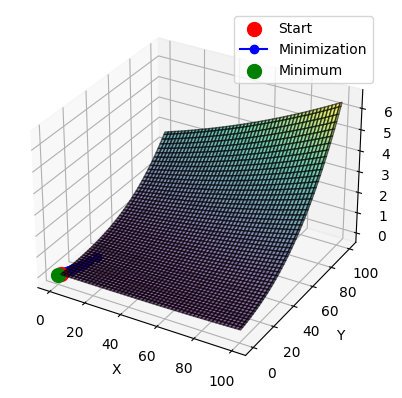

In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def function(x, y):
    return (x + 3 * y) * (x + 3 * y) * (x + 3 * y) + 2 * x

def dx(x, y):
    return 3 * ((x + 3 * y) * (x + 3 * y)) + 2

def dy(x, y):
    return 9 * ((x + 3 * y) * (x + 3 * y))

def gradient_descent(learning_rate, iterations):
    x = np.random.uniform(1, 100)
    y = np.random.uniform(1, 100)

    history = []

    for _ in range(iterations):

        x = x - learning_rate * dx(x,y)
        y = y - learning_rate * dy(x,y)
        history.append([x, y, function(x, y)])

    return np.array(history)

x_vals = np.linspace(1, 100, 100)
y_vals = np.linspace(1, 100, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = function(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='k')
ax.scatter(1, 1, function(1, 1), color='red', marker='o', s=100, label='Start')

learning_rate = 0.0001
iterations = 1000
history = gradient_descent(learning_rate, iterations)

ax.plot(history[:, 0], history[:, 1], history[:, 2], color='blue', marker='o', label='Minimization')

ax.scatter(history[-1, 0], history[-1, 1], history[-1, 2], color='green', marker='o', s=100, label='Minimum')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.legend()

plt.show()
